### What commodities can support the drive for growth?

In [1]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_2017_2020_cleanJP.csv')

In [3]:
df.head()

,Unnamed: 0,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first,t_date,month,quarter,demo_child
0,0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18,0.99,0,2018-10-01,10,Q4,kids
1,1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18,0.70,0,2018-10-01,10,Q4,kids
2,2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18,1.68,0,2018-10-01,10,Q4,kids
3,3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18,2.59,0,2018-10-01,10,Q4,kids
4,4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18,0.60,0,2018-10-01,10,Q4,kids


In [4]:
#find out unique volume of basket
df['basket_id'].nunique()

3479

In [5]:
#how many product sold
df.groupby(['age_band','demo_child']).agg({'customer_id': pd.Series.nunique,'basket_id': pd.Series.nunique,'product_id': pd.Series.nunique, 'price':'sum'})

customer_id  basket_id  product_id     price
age_band        demo_child                                              
19-24           kids                483        509        4707  37228.41
                no kids            1145       1246        7232  92281.05
25-34           kids                237        251        2984  17648.38
                no kids             312        334        3584  23646.20
35-44           kids                191        196        2437  14006.36
                no kids              19         21         326   1300.82
45-54           kids                848        908        6232  64114.37
55-64           kids                  6          6         133    430.66
Greater than 65 kids                  8          8         141    425.74

In [6]:
#create new df that remove any basket that as beef in it
noBeefbasket = df[~df.basket_id.isin(df[df.commodity == 'Beef'].basket_id.unique())]
noBeefbasket.basket_id.unique()

array([52237, 52210, 57357, ..., 80896, 81103, 81146], dtype=int64)

In [7]:
#count unique basket with no beef
noBeefbasket['basket_id'].nunique()

1529

In [8]:
#percentage of no beef baskets in relation to all baskets
noBeefbasket['basket_id'].nunique()/ df['basket_id'].nunique()

0.4394941075021558

In [9]:
#Average basket value of NO beef basket
noBeefbasket['price'].sum() #/ noBeefbasket['basket_id'].nunique()

102677.42000000001

In [10]:
yesBeefbasket = df[df.basket_id.isin(df[df.commodity == 'Beef'].basket_id.unique())]
yesBeefbasket['basket_id'].nunique()

1950

In [11]:
#Average basket value of YES beef basket
yesBeefbasket['price'].sum() / yesBeefbasket['basket_id'].nunique()

76.10490769230768

In [12]:
#difference in basket value of beef vs non-beef
(yesBeefbasket['price'].sum() / yesBeefbasket['basket_id'].nunique()) / (noBeefbasket['price'].sum() / noBeefbasket['basket_id'].nunique())

1.1333008159100455

In [13]:
yesBeefbasket.head()

,Unnamed: 0,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first,t_date,month,quarter,demo_child
0,0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18,0.99,0,2018-10-01,10,Q4,kids
1,1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18,0.70,0,2018-10-01,10,Q4,kids
2,2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18,1.68,0,2018-10-01,10,Q4,kids
3,3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18,2.59,0,2018-10-01,10,Q4,kids
4,4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18,0.60,0,2018-10-01,10,Q4,kids


In [14]:
yesBeefbasket.groupby(['age_band','demo_child', 'household_type']).agg(number_basket=('basket_id', pd.Series.nunique))

number_basket
age_band        demo_child household_type                      
19-24           kids       1 adult with kids                214
                           2 adults with kids                69
                no kids    2 adults with no kids            323
                           Single female                    147
                           Single male                      243
25-34           kids       1 adult with kids                117
                           2 adults with kids                17
                no kids    2 adults with no kids             81
                           Single female                     28
                           Single male                       62
35-44           kids       1 adult with kids                107
                           2 adults with kids                 4
                no kids    2 adults with no kids              6
                           Single male                        3
45-54           kids       1 adult with kids                 25
                           2 adults with kids               496
55-64           kids       1 adult with kids                  1
                           2 adults with kids                 4
Greater than 65 kids       2 adults with kids                 3

In [15]:
noBeefbasket.groupby(['age_band','demo_child']).agg(number_basket=('basket_id', pd.Series.nunique))

number_basket
age_band        demo_child               
19-24           kids                  226
                no kids               533
25-34           kids                  117
                no kids               163
35-44           kids                   85
                no kids                12
45-54           kids                  387
55-64           kids                    1
Greater than 65 kids                    5

In [16]:
#add a year  and year + quarter column
df.transaction_date = pd.to_datetime(df.transaction_date) #Have to change to datetime format
df["year"] = df.transaction_date.dt.year
df["period"] = df["year"].astype(str) + ", " + df["quarter"]
df.dtypes

Unnamed: 0                   int64
customer_id                  int64
product_id                   int64
basket_id                    int64
loyalty                     object
household_type              object
age_band                    object
department                  object
brand                       object
commodity                   object
store                        int64
transaction_date    datetime64[ns]
price                      float64
days_since_first             int64
t_date                      object
month                        int64
quarter                     object
demo_child                  object
year                         int64
period                      object
dtype: object

In [18]:
#create a new df and check the value captured
top8_comm = df[df.commodity.str.lower().str.contains('beef|cheese|frozen meat|deli meats|seafood-frozen|salad|lunch meat|pork') & ~df.commodity.str.lower().str.contains('dressing|vegetables')].copy()
print(top8_comm['commodity'].unique())

['Deli meats' 'Lunch meat' 'Seafood-frozen' 'Beef' 'Salad' 'Cheese'
 'Frozen meat' 'Pork']


ValueError: could not convert string to Timestamp

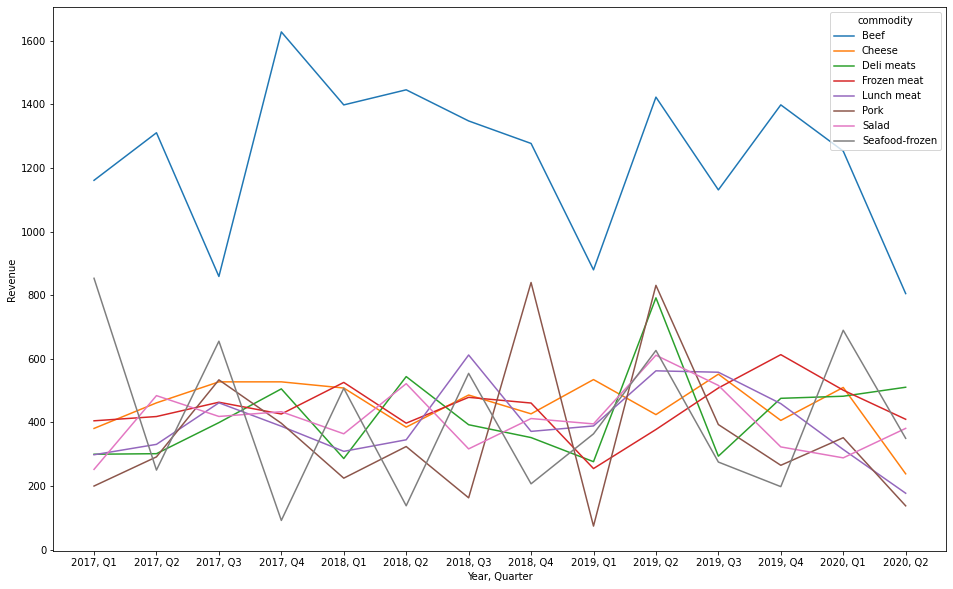

In [19]:
#graphing
tmp_top8_comm = top8_comm.groupby(['commodity', 'period']).agg(revenue=('price', sum)).reset_index()

plt.figure(figsize=(16,10)) #enlarge the chart
sns.lineplot(data=tmp_top8_comm, x='period', y='revenue', hue='commodity');
plt.xlabel('Year, Quarter')
plt.ylabel('Revenue')
x_labels = pd.date_range(tmp_top8_comm.period.min(),tmp_top8_comm.period.max(),12)
# We use the method date_range to customize the number of dates in our x-axis. We only print 12 date labels
plt.xticks(x_labels);

In [20]:
# Beef eater unique value 
yesBeefbasket.groupby(['age_band','demo_child']).agg({'customer_id': pd.Series.nunique,'basket_id': pd.Series.nunique,'product_id': pd.Series.nunique, 'price':'sum'})

customer_id  basket_id  product_id     price
age_band        demo_child                                              
19-24           kids                270        283        3289  21497.62
                no kids             680        713        5676  55745.17
25-34           kids                130        134        1949  10050.39
                no kids             165        171        2301  13075.77
35-44           kids                110        111        1660   8467.02
                no kids               9          9         152    597.76
45-54           kids                504        521        4672  38415.33
55-64           kids                  5          5         114    387.04
Greater than 65 kids                  3          3          50    168.47

In [21]:
# Non-Beef eater unique value 
noBeefbasket.groupby(['age_band','demo_child']).agg({'customer_id': pd.Series.nunique,'basket_id': pd.Series.nunique,'product_id': pd.Series.nunique, 'price':'sum'})

customer_id  basket_id  product_id     price
age_band        demo_child                                              
19-24           kids                221        226        2748  15730.79
                no kids             510        533        4751  36535.88
25-34           kids                112        117        1629   7597.99
                no kids             160        163        2145  10570.43
35-44           kids                 85         85        1237   5539.34
                no kids              12         12         187    703.06
45-54           kids                374        387        3907  25699.04
55-64           kids                  1          1          19     43.62
Greater than 65 kids                  5          5          92    257.27